In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def BrownianMotion(T, n):
    """
    T: final time
    n: number of discretized brownian motion till time T
    """
    dt = T/n
    ts = np.arange(0, T+dt, dt)
    dws = np.random.normal(0, dt**(1/2), len(ts))
    wiener = np.cumsum(dws)
    
    return ts, dws, wiener

In [51]:
def StochasticIntegral(T, n):
    """
    T: final time
    n: number of discretized brownian motion till time T
    """
    ts, dws, wiener = BrownianMotion(T, n)
    wiener = list(wiener)
    wiener.insert(0, 0)   # Coloco o 0 como primeiro elemento, e retiro o W_n
    integral = np.cumsum(wiener[:-1] * dws)

    return ts, wiener, integral

In [120]:
T = 1
n = 1000
m = 1000

hist_integral = []
analiticas = []
gamma_approxs = []
for _ in range(m):
    ts, wiener, integral = StochasticIntegral(T, n)
    analitica = (wiener[-1] ** 2) / 2 - T/2
    gamma_approx = -T/2 + 1 / 2 * np.random.gamma(1/2 , T)

    hist_integral.append(integral[-1])
    analiticas.append(analitica)
    gamma_approxs.append(gamma_approx)

<Axes: ylabel='Count'>

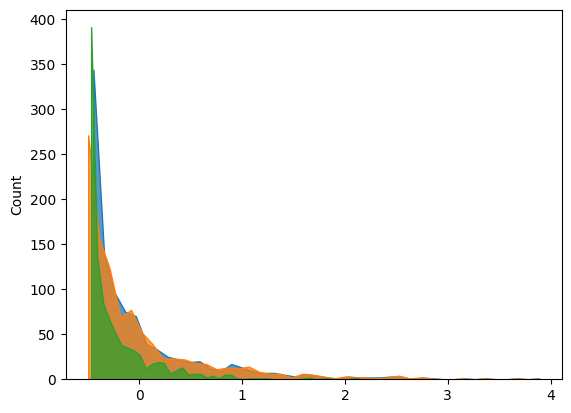

In [122]:
sns.histplot(data=analiticas, element="poly")
sns.histplot(data=hist_integral, element="poly")
sns.histplot(data=gamma_approxs, element="poly")

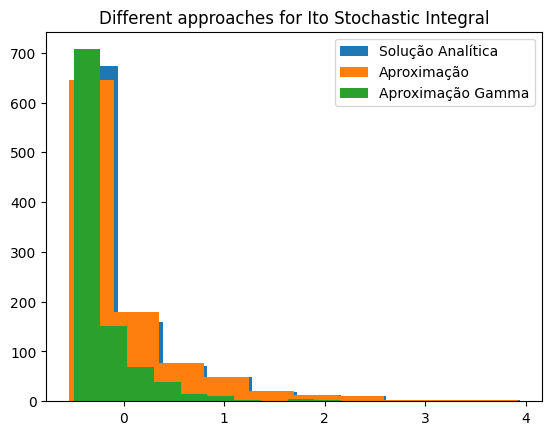

In [123]:

plt.hist(analiticas, label='Solução Analítica')
plt.hist(hist_integral, label='Aproximação')
plt.hist(gamma_approxs, label='Aproximação Gamma')
plt.title('Different approaches for Ito Stochastic Integral')
plt.legend()
plt.show()